## Imports

First we import the required packages and `feems`:

In [1]:
# base
import numpy as np
import pandas as pd

# viz
import geopandas as gpd
from shapely.geometry import MultiPolygon
from shapely.geometry import Point
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import seaborn as sns

import contextily as cx

In [2]:
def random_points_within(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds
    x = (np.linspace(min_x,max_x,num_points))
    y=  (np.linspace(min_y,max_y,num_points))
    xx,yy = np.meshgrid(x,y,sparse=True)
    xx = xx.reshape((np.prod(xx.shape),))
    yy = yy.reshape((np.prod(yy.shape),))
    points = []

    for x in xx:
       for y in yy:
           random_point = Point([x, y])
           if (random_point.within(poly)):
              points.append(list(random_point.coords))
    print(min_x,max_x,max_y,min_y)
    return points,xx,yy


def points_from_polygons(polygons):
    points = []
    for mpoly in polygons:
        if isinstance(mpoly, MultiPolygon):
            polys = list(mpoly)
        else:
            polys = [mpoly]
        for polygon in polys:
            for point in polygon.exterior.coords:
                points.append(point)
            for interior in polygon.interiors:
                for point in interior.coords:
                    points.append(point)
    return points

## Data

In [3]:
metadata = pd.read_csv("../resources/metadata/samples.meta.spp.csv")
metadata = metadata.query("species_gambiae_coluzzii == 'coluzzii'")
coords = metadata[['latitude', 'longitude']].to_numpy()
coords[:5,]

array([[ 6.302, -1.682],
       [ 6.299, -1.801],
       [ 6.299, -1.801],
       [ 6.299, -1.801],
       [ 6.254, -1.841]])

Read overall map and sample locations

In [4]:
Africa = gpd.read_file("../map/Africa.dbf")
Africa.crs = "EPSG:3857"

# Ghana
Ghana_outer = Africa.query('COUNTRY == "Ghana"')

# Sample positions
GaardianGeo = gpd.GeoDataFrame(
    metadata, geometry=gpd.points_from_xy(metadata.longitude, metadata.latitude, crs="EPSG:3857"))

coords = np.array(list(zip(GaardianGeo['geometry'].x, GaardianGeo['geometry'].y)))

In [5]:
Gaardian_outer = GaardianGeo.dissolve().convex_hull.reset_index().rename({0:'geometry'},axis=1)
Gaardian_outer = Gaardian_outer.to_crs(epsg=3857)
Gaardian_outer.geometry = Gaardian_outer.geometry.buffer(0.1)

Define grid for simulations

In [6]:
from matplotlib.collections import LineCollection
from mpl_toolkits.basemap import Basemap
import cartopy.io.img_tiles as cimgt

In [97]:
related = pd.read_csv("../results/relatedness/coluzzii_relatedness.tsv", sep="\t")

In [99]:
related = related[related.KING > 0.04]
related.shape

(474, 8)

In [100]:
related.head(2)

,KING,latitude.x,longitude.x,latitude.y,longitude.y,location2.y,location2.x,dist
112,0.040858,6.302,-1.682,6.001,-1.920,Nkotumso,Adumanu,42593.52478
521,0.041686,6.299,-1.801,6.368,-1.463,Kokotro,Kente,38154.91217


In [131]:
lwidth = related['KING'].values*100

In [141]:
lines = [related['longitude.x'].values, related['longitude.y'].values]
         
        related['latitude.x'].values, related['latitude.y'].values])

In [153]:
lines[0,:]

array([-1.682, -1.801, -1.801, -1.801, -1.801, -1.801, -1.801, -1.801,
       -1.801, -1.801, -1.801, -1.801, -1.801, -1.801, -1.801, -1.801,
       -1.801, -1.801, -1.801, -1.801, -1.801, -1.841, -1.841, -1.841,
       -1.841, -1.841, -1.841, -1.841, -1.841, -1.841, -1.841, -1.841,
       -1.917, -1.917, -1.917, -1.916, -1.916, -1.916, -1.835, -1.794,
       -1.794, -1.451, -1.451, -1.451, -1.451, -1.451, -1.451, -1.451,
       -1.451, -1.451, -1.451, -1.451, -1.451, -1.451, -1.451, -1.451,
       -1.451, -1.451, -1.451, -1.451, -1.451, -1.451, -1.451, -1.451,
       -1.451, -1.451, -1.451, -1.451, -1.453, -1.453, -1.453, -1.453,
       -1.453, -1.453, -1.463, -1.463, -1.463, -1.463, -1.463, -1.469,
       -1.514, -1.449, -1.449, -1.449, -1.39 , -1.39 , -1.39 , -1.39 ,
       -1.372, -1.372, -1.37 , -1.37 , -1.37 , -1.37 , -1.37 , -1.696,
       -1.696, -1.696, -1.696, -1.697, -1.663, -1.697, -1.697, -1.697,
       -1.697, -1.697, -1.697, -1.697, -1.697, -1.697, -1.697, -1.697,
      

In [151]:
np.reshape(lines, [474, 2, 2])

array([[[-1.682, -1.801],
        [-1.801, -1.801]],

       [[-1.801, -1.801],
        [-1.801, -1.801]],

       [[-1.801, -1.801],
        [-1.801, -1.801]],

       ...,

       [[ 6.049,  6.049],
        [ 6.049,  6.049]],

       [[ 6.049,  6.049],
        [ 6.049,  6.049]],

       [[ 6.049,  6.049],
        [ 6.049,  6.049]]])

In [144]:
np.reshape(lines)

TypeError: _reshape_dispatcher() missing 1 required positional argument: 'newshape'

In [142]:
LineCollection(lines, 
               linewidths=(lwidth), linestyle='solid')

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (474,).

TypeError: only size-1 arrays can be converted to Python scalars

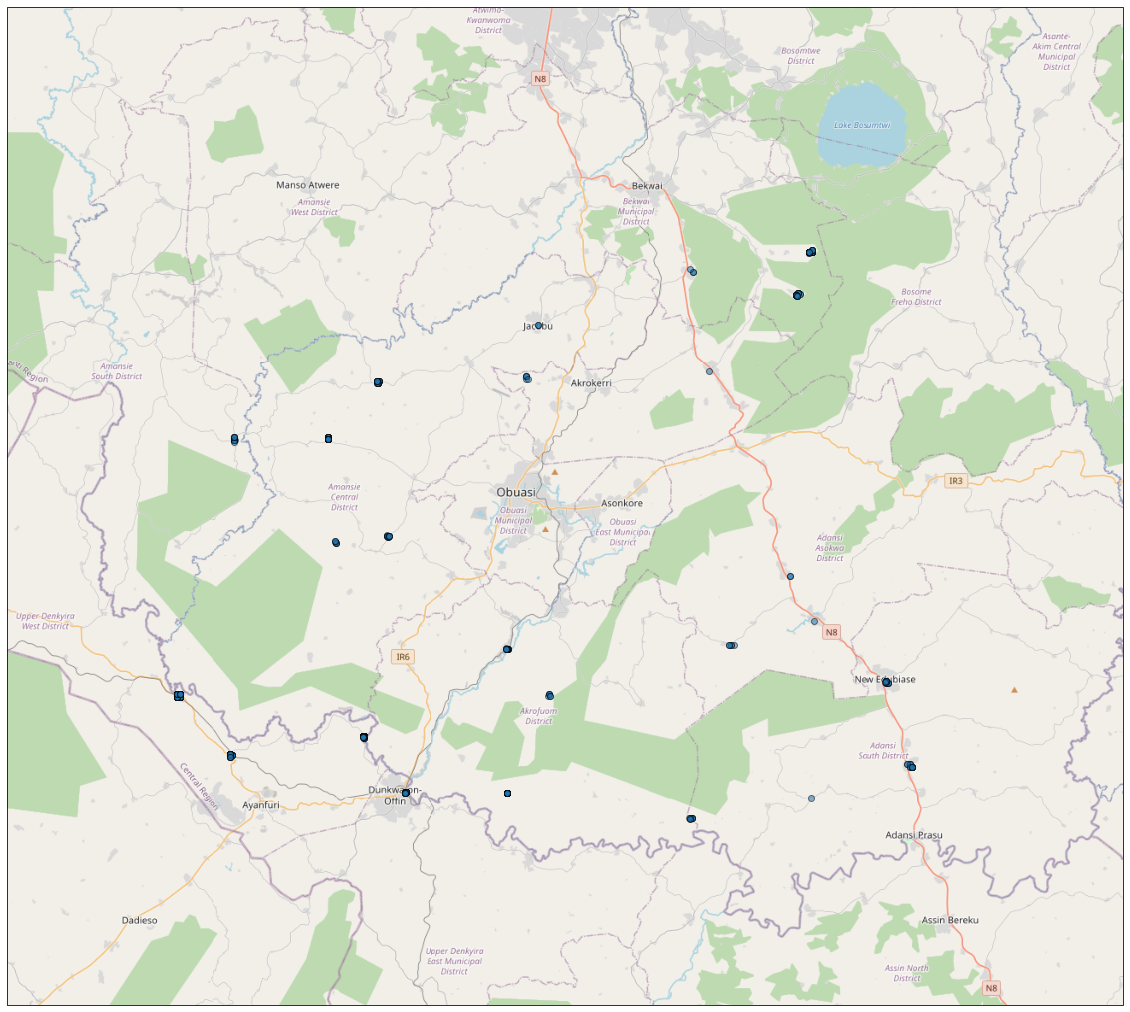

In [133]:
request = cimgt.OSM()
plt.figure(figsize=[20,20])
# Bounds: (lon_min, lon_max, lat_min, lat_max):
extent = [-2.1, -1.2, 5.8, 6.6]

ax = plt.axes(projection=request.crs)
ax.set_extent(extent)
ax.add_image(request, 11)
GaardianGeo.plot(ax=ax, alpha=0.5, edgecolor="black", transform=ccrs.PlateCarree())
ax.plot([related['longitude.x'].values, related['longitude.y'].values], 
        [related['latitude.x'].values, related['latitude.y'].values], transform=ccrs.PlateCarree(), marker='o', linewidth=lwidth)
plt.show()